In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('housing_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
# understanding the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
# Checking missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

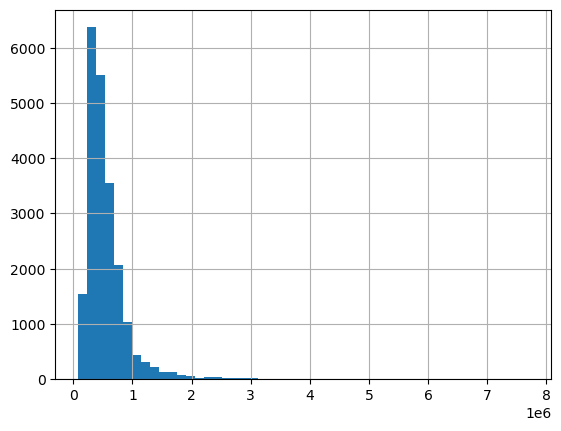

In [59]:
# visulization
data['price'].hist(bins=50)

<Axes: xlabel='sqft_living', ylabel='price'>

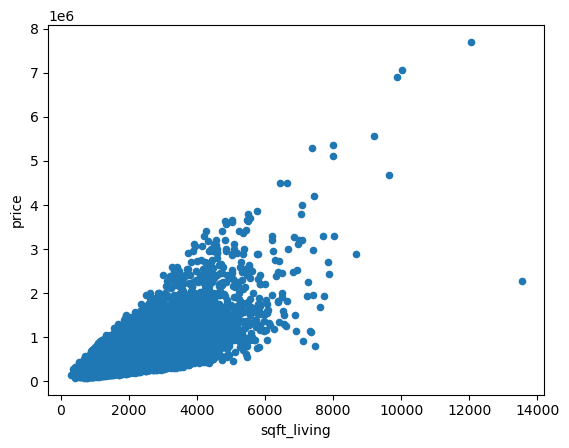

In [60]:
# scatter plots
data.plot(kind='scatter', x='sqft_living', y='price')

In [61]:
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [62]:
# convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [63]:
# categorize columns

date_cols = ['date', 'yr_built','yr_renovated']
cat_cols = ['id','zipcode']
num_cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']

In [64]:
# plot shows the price range according to zipcode

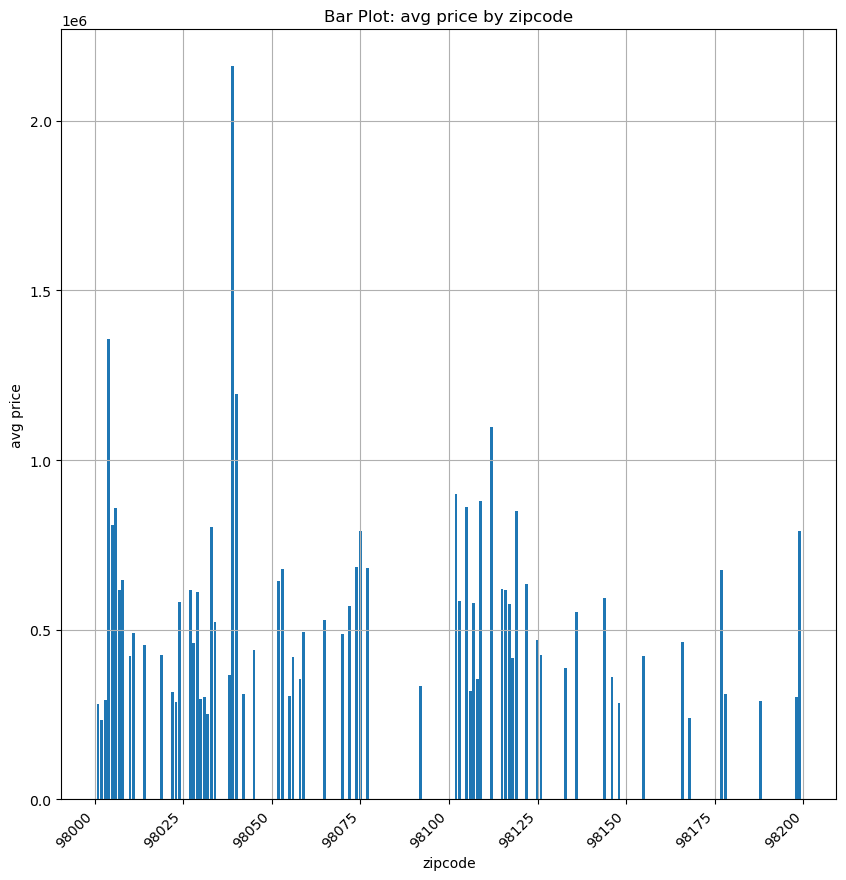

In [65]:
# group by 'zipcode' and calculate the avg price
avg_price_by_zipcode = data.groupby('zipcode')['price'].mean().reset_index()

# create a larger figure for the plot
plt.figure(figsize=(10,10))

# create a bar plot
plt.bar(avg_price_by_zipcode['zipcode'], avg_price_by_zipcode['price'])
plt.xlabel('zipcode')
plt.ylabel('avg price')
plt.title('Bar Plot: avg price by zipcode')
plt.xticks(rotation = 45, ha='right')
plt.grid(True)

plt.show()

In [71]:
zipcode_sum = data.groupby('zipcode').agg(zipcode_count = ('zipcode','nunique'), price_avg = ('price', 'mean')).reset_index()
zipcode_sum = zipcode_sum.sort_values(by='price_avg')
zipcode_sum.head(5)

,zipcode,zipcode_count,price_avg
1,98002,1,234284.035176
64,98168,1,240328.371747
20,98032,1,251296.240000
0,98001,1,280804.690608
61,98148,1,284908.596491


In [72]:
# Feature Engineering

In [73]:
# Define the threshold for expensive property
price_threshold = 450000e+05 

# Create a binary flag feature for expensive properties
data['expensive_property'] = (data['price'] > price_threshold).astype(int)

# Display the first few rows to verify the new feature
data[['price', 'expensive_property']].head()


,price,expensive_property
0,221900.0,0
1,538000.0,0
2,180000.0,0
3,604000.0,0
4,510000.0,0


In [75]:
data['expensive_property'].count()

21613